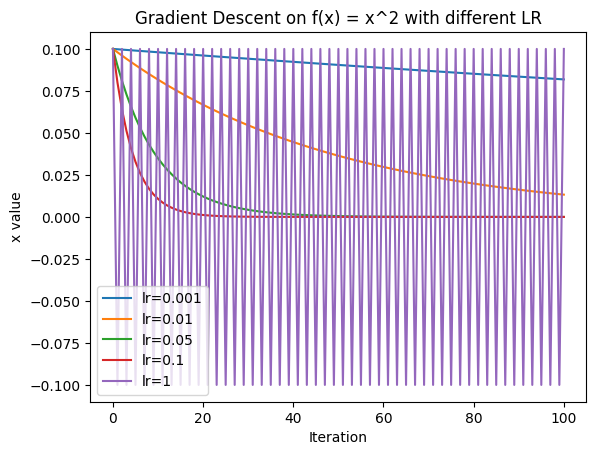

In [135]:
# Convex Function: 

import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return x ** 2

def grad_f1(x):
    return 2 * x

def gradient_descent(grad, start_point, learning_rate, num_iterations):
    x = start_point
    x_history = [x]
    for i in range(num_iterations):
        x -= learning_rate * grad(x)
        x_history.append(x)
    return x_history

start_point = 0.1  
learning_rates = [0.001, 0.01, 0.05, 0.1, 1] 
num_iterations = 100

for lr in learning_rates:
    x_history = gradient_descent(grad_f1, start_point, lr, num_iterations)
    plt.plot(x_history, label=f'lr={lr}')

plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Gradient Descent on f(x) = x^2 with different LR')
plt.legend()
plt.show()

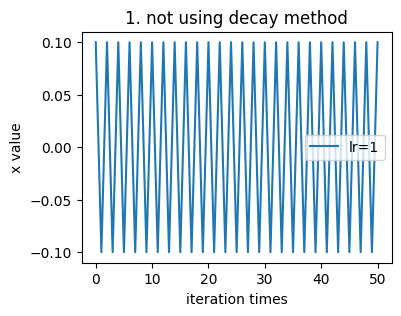

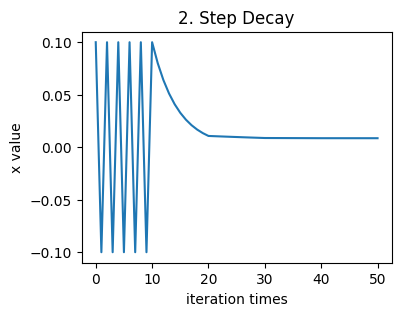

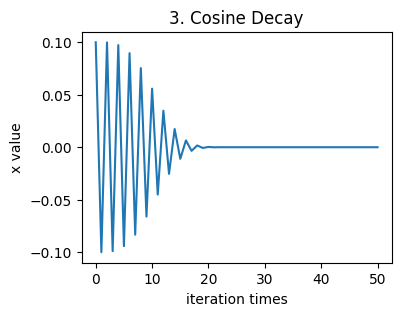

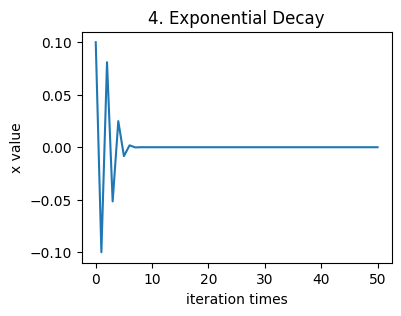

In [191]:
# not using decay method
def gradient_descent(grad, start_point, learning_rate, num_iterations):
    x = start_point
    x_history = [x]
    for i in range(num_iterations):
        x -= learning_rate * grad(x)
        x_history.append(x)
    return x_history

# Time-based Decay
def gradient_descent_time_decay(grad, start_point, initial_lr, num_iterations, decay_rate):
    x = start_point
    x_history = [x]
    for i in range(num_iterations):
        lr = initial_lr / (1 + decay_rate * i)
        x -= lr * grad(x)
        x_history.append(x)
    return x_history

# Step Decay
def gradient_descent_step_decay(grad, start_point, initial_lr, num_iterations, drop_rate, epochs_drop):
    x = start_point
    x_history = [x]
    for i in range(num_iterations):
        lr = initial_lr * np.power(drop_rate, np.floor(i / epochs_drop))
        x -= lr * grad(x)
        x_history.append(x)
    return x_history

# Cosine Decay
def gradient_descent_cosine_decay(grad, start_point, initial_lr, num_iterations):
    x = start_point
    x_history = [x]
    for i in range(num_iterations):
        lr = initial_lr * (1 + np.cos(np.pi * i / num_iterations)) / 2
        x -= lr * grad(x)
        x_history.append(x)
    return x_history

# Exponential Decay
def gradient_descent_exp_decay(grad, start_point, initial_lr, num_iterations, decay_rate):
    x = start_point
    x_history = [x]
    for i in range(num_iterations):
        lr = initial_lr * np.exp(-decay_rate * i)
        x -= lr * grad(x)
        x_history.append(x)
    return x_history

start_point = 0.1
initial_lr = 1
num_iterations = 50
decay_rate = 0.1  # Exponential Decay
drop_rate = 0.1   # Step Decay
epochs_drop = 10  # Step Decay）

# 1.not using decay method
learning_rates = [1]
plt.figure(figsize=(4, 3))
for lr in learning_rates:
    x_history = gradient_descent(grad_f1, start_point, lr, num_iterations)
    plt.plot(x_history, label=f'lr={lr}')
plt.xlabel('iteration times')
plt.ylabel('x value')
plt.title('1. not using decay method')
plt.legend()
plt.show()

# 2. Step Decay
plt.figure(figsize=(4, 3))
x_history = gradient_descent_step_decay(grad_f1, start_point, initial_lr, num_iterations, drop_rate, epochs_drop)
plt.plot(x_history)
plt.xlabel('iteration times')
plt.ylabel('x value')
plt.title('2. Step Decay')
plt.show()

# 3. Cosine Decay
plt.figure(figsize=(4, 3))
x_history = gradient_descent_cosine_decay(grad_f1, start_point, initial_lr, num_iterations)
plt.plot(x_history)
plt.xlabel('iteration times')
plt.ylabel('x value')
plt.title('3. Cosine Decay')
plt.show()

# 4. Exponential Decay
plt.figure(figsize=(4, 3))
x_history = gradient_descent_exp_decay(grad_f1, start_point, initial_lr, num_iterations, decay_rate)
plt.plot(x_history)
plt.xlabel('iteration times')
plt.ylabel('x value')
plt.title('4. Exponential Decay')
plt.show()


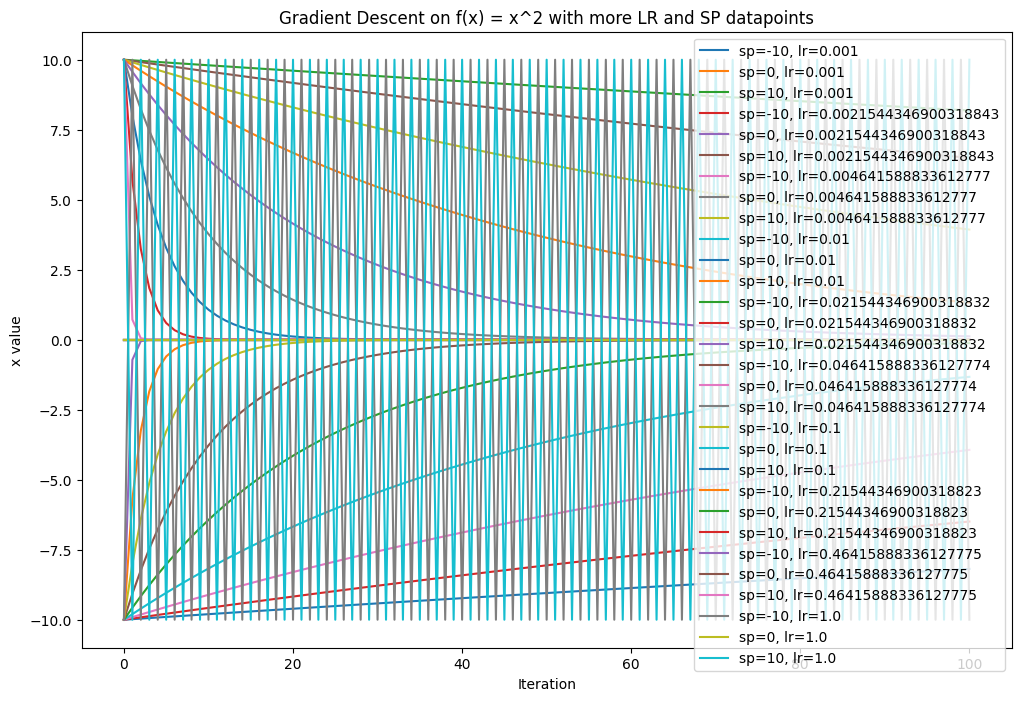

In [137]:
# Convex Function: more data points
start_points = [-10, 0, 10]  
learning_rates = np.logspace(-3, 0, num=10)  
num_iterations = 100  

plt.figure(figsize=(12, 8))
for lr in learning_rates:
    for sp in start_points:
        x_history = gradient_descent(grad_f1, sp, lr, num_iterations)
        plt.plot(x_history, label=f'sp={sp}, lr={lr}')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Gradient Descent on f(x) = x^2 with more LR and SP datapoints')
plt.legend()
plt.show()

In [151]:
import numpy as np
from scipy.optimize import minimize

# Define the function
def f(x):
    return x**2 - np.cos(4*x)

# Find local minima near -2
initial_guess = -1.4
local_min = minimize(f, initial_guess)

local_min

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.1817612017356278
        x: [-1.380e+00]
      nit: 3
      jac: [-3.725e-07]
 hess_inv: [[ 7.356e-02]]
     nfev: 10
     njev: 5

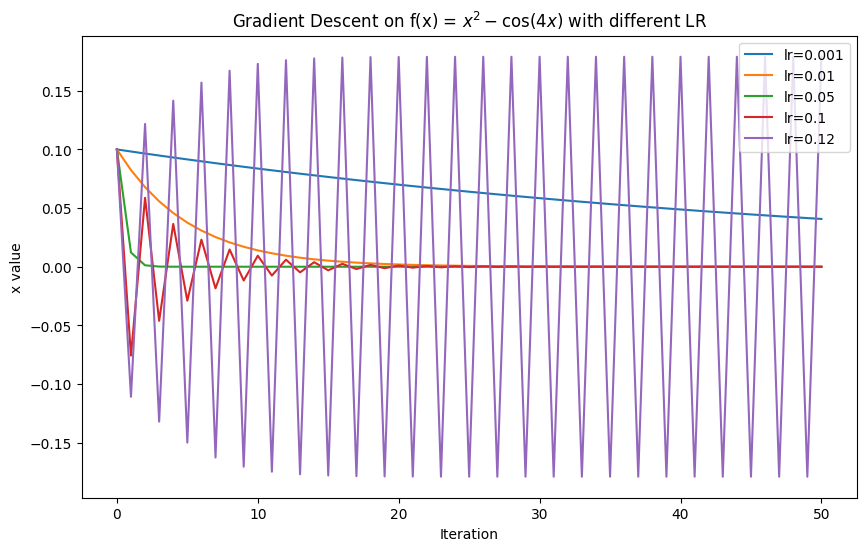

In [163]:
# Non-convex Function

# Define the non-convex function f(x) = x^2 - cos(6x)
def f_nonconvex(x):
    return x**2 - np.cos(4*x)

# Define the gradient of the non-convex function
def grad_f_nonconvex(x):
    return 2*x + 4*np.sin(4*x)

# Implement the gradient descent algorithm
def gradient_descent(grad, start_point, learning_rate, num_iterations):
    x = start_point
    x_history = [x]
    for i in range(num_iterations):
        x -= learning_rate * grad(x)
        x_history.append(x)
    return x_history

# Parameters for the gradient descent
start_point = 0.1  # Initial point
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.12]  # Different learning rates
num_iterations = 50  # Number of iterations

# Run gradient descent for each learning rate and plot the results
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    x_history = gradient_descent(grad_f_nonconvex, start_point, lr, num_iterations)
    plt.plot(x_history, label=f'lr={lr}')

plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Gradient Descent on f(x) = $x^2 - \cos(4x)$ with different LR')
plt.legend()
plt.show()

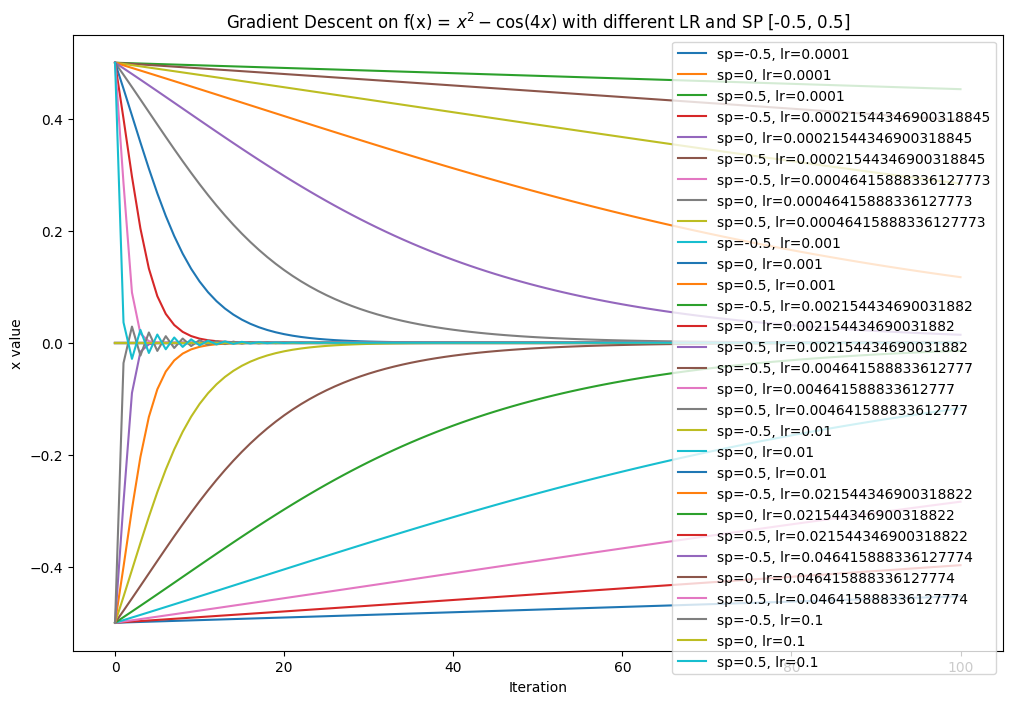

In [174]:

# Define the non-convex function
def f_nonconvex(x):
    return x**2 - np.cos(4*x)

# Define the gradient of the non-convex function
def grad_f_nonconvex(x):
    return 2*x + 4*np.sin(4*x)

# Implement the gradient descent algorithm
def gradient_descent(grad, start_point, learning_rate, num_iterations):
    x = start_point
    x_history = [x]
    for i in range(num_iterations):
        x -= learning_rate * grad(x)
        x_history.append(x)
    return x_history

# Parameters for the gradient descent
start_points = [-0.5, 0, 0.5]  # Different initial points to capture different behaviors
learning_rates = np.logspace(-4, -1, num=10)  # Logarithmically spaced learning rates from 0.0001 to 0.1
num_iterations = 100  # Increased number of iterations for better observation

# Test the gradient descent on f(x) = x^2 - cos(6x)
plt.figure(figsize=(12, 8))
for lr in learning_rates:
    for sp in start_points:
        x_history = gradient_descent(grad_f_nonconvex, sp, lr, num_iterations)
        plt.plot(x_history, label=f'sp={sp}, lr={lr}')

plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Gradient Descent on f(x) = $x^2 - \cos(4x)$ with different LR and SP [-0.5, 0.5]')
plt.legend()
plt.show()

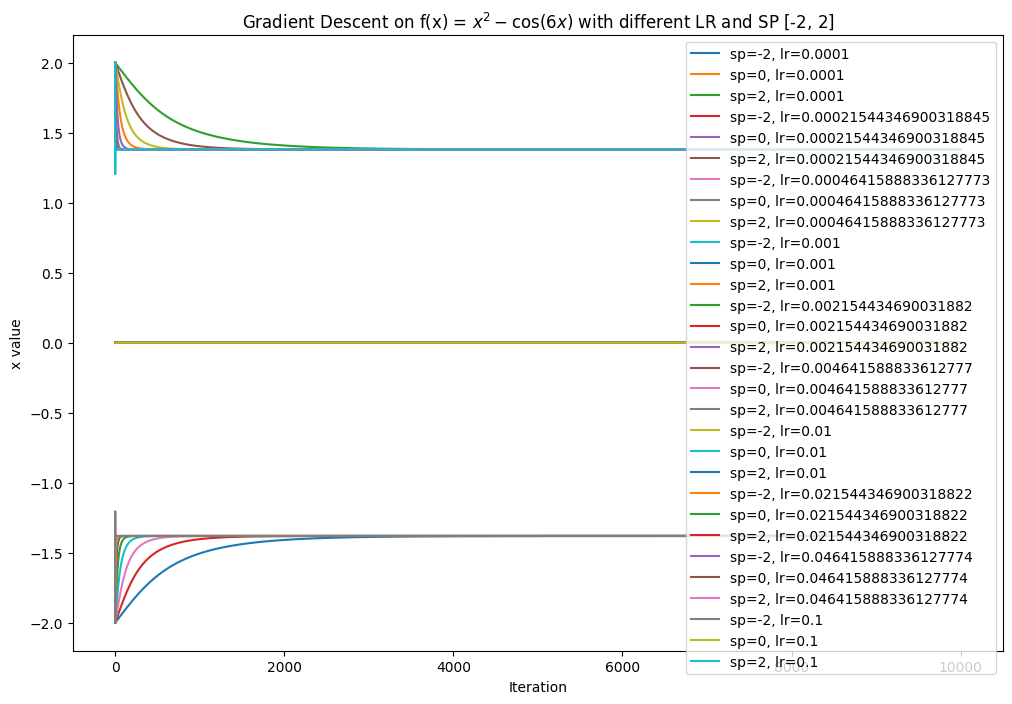

In [ ]:
# Implement the gradient descent algorithm
def gradient_descent(grad, start_point, learning_rate, num_iterations):
    x = start_point
    x_history = [x]
    for i in range(num_iterations):
        x -= learning_rate * grad(x)
        x_history.append(x)
    return x_history

# Parameters for the gradient descent
start_points = [-2, 0, 2]  # Different initial points to capture different behaviors
learning_rates = np.logspace(-4, -1, num=10)  # Logarithmically spaced learning rates from 0.0001 to 0.1
num_iterations = 10000  # Increased number of iterations for better observation

# Test the gradient descent on f(x) = x^2 - cos(6x)
plt.figure(figsize=(12, 8))
for lr in learning_rates:
    for sp in start_points:
        x_history = gradient_descent(grad_f_nonconvex, sp, lr, num_iterations)
        plt.plot(x_history, label=f'sp={sp}, lr={lr}')

plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Gradient Descent on f(x) = $x^2 - \cos(6x)$ with different LR and SP [-2, 2]')
plt.legend()
plt.show()

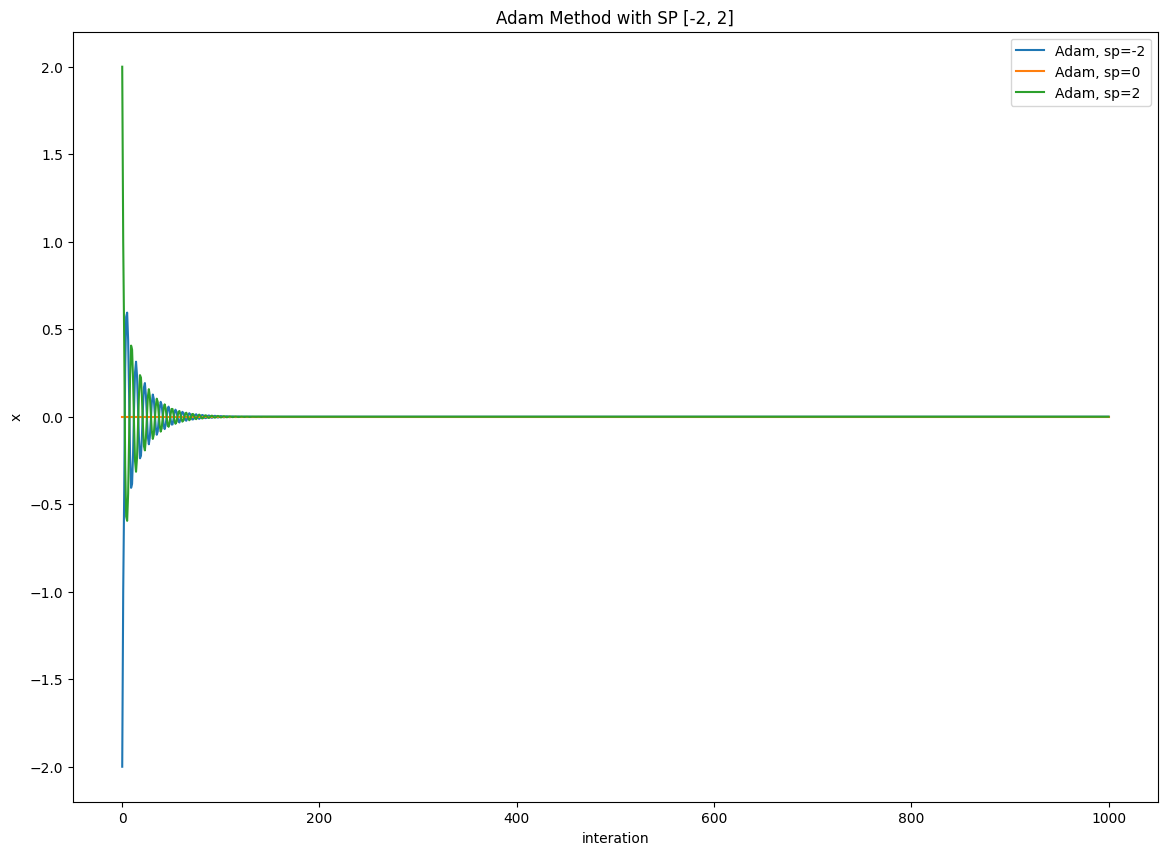

In [193]:
def f_nonconvex(x):
    return x**2 - np.cos(4*x)

def grad_f_nonconvex(x):
    return 2*x + 4*np.sin(4*x)

def adam_optimizer(grad, start_point, initial_lr, num_iterations, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = start_point
    m = 0
    v = 0
    x_history = [x]
    for i in range(1, num_iterations + 1):
        g = grad(x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g ** 2)
        m_hat = m / (1 - beta1 ** i)
        v_hat = v / (1 - beta2 ** i)
        x -= initial_lr * m_hat / (np.sqrt(v_hat) + epsilon)
        x_history.append(x)
    return x_history


start_points = [-2, 0, 2] 
initial_lr = 1  
num_iterations = 1000  


plt.figure(figsize=(14, 10))

for sp in start_points:
    x_history_adam = adam_optimizer(grad_f_nonconvex, sp, initial_lr, num_iterations)
    plt.plot(x_history_adam, label=f'Adam, sp={sp}')

plt.xlabel('interation')
plt.ylabel('x')
plt.title('Adam Method with SP [-2, 2]')
plt.legend()
plt.show()


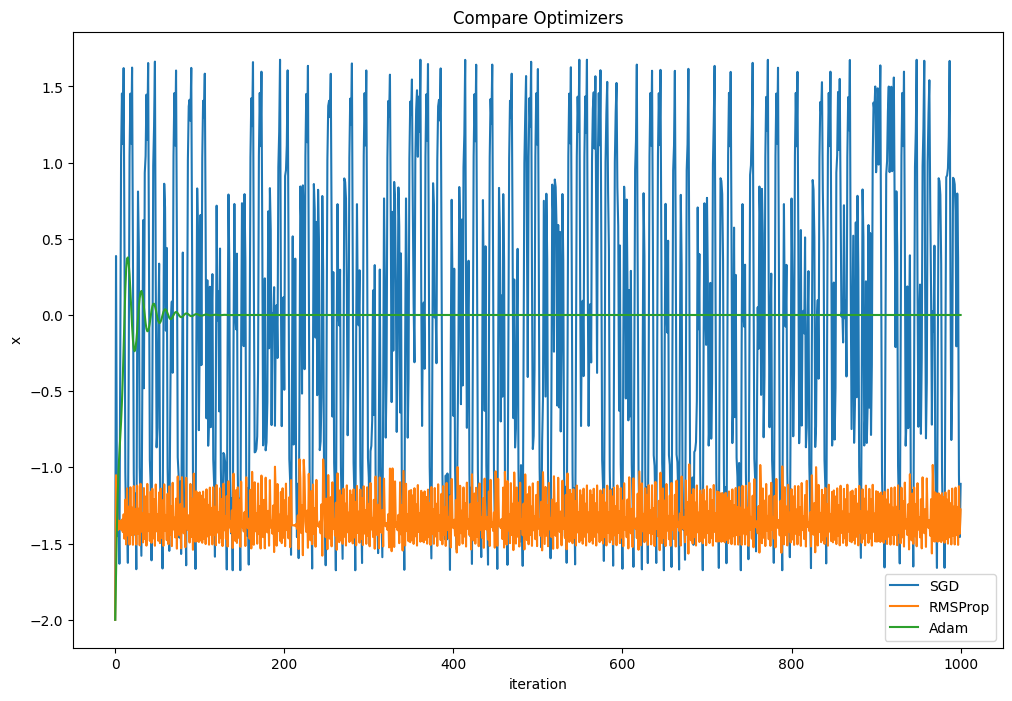

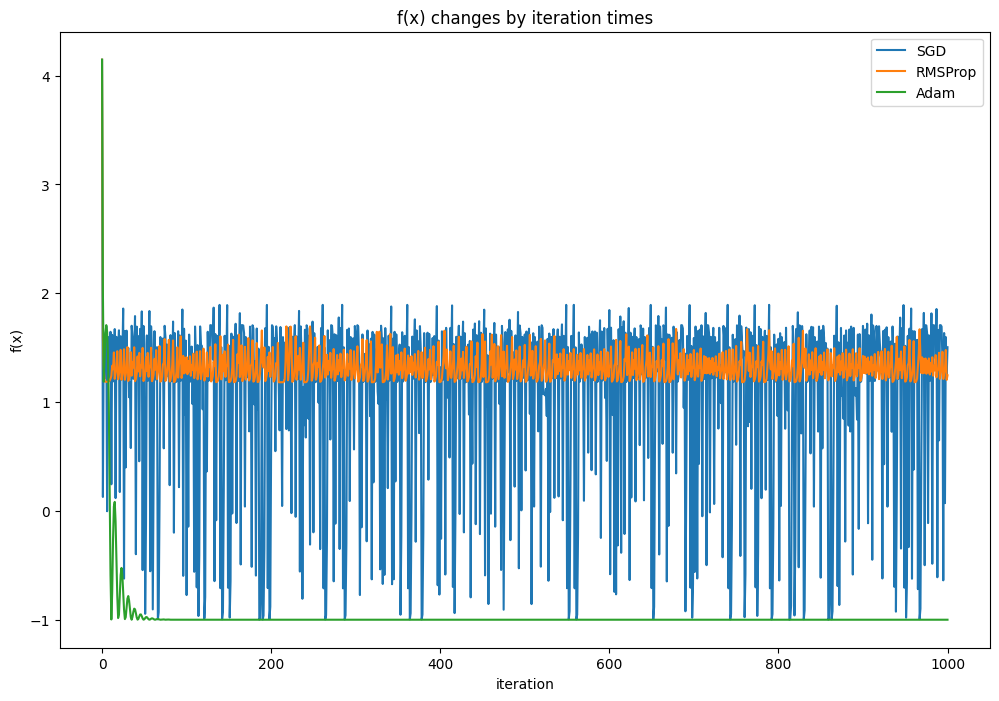

In [ ]:
# SGD
def sgd_optimizer(grad, start_point, learning_rate, num_iterations):
    x = start_point
    x_history = [x]
    for _ in range(num_iterations):
        x -= learning_rate * grad(x)
        x_history.append(x)
    return x_history

# RMSProp
def rmsprop_optimizer(grad, start_point, learning_rate, num_iterations, beta=0.9, epsilon=1e-8):
    x = start_point
    x_history = [x]
    Eg = 0
    for _ in range(num_iterations):
        g = grad(x)
        Eg = beta * Eg + (1 - beta) * g**2
        x -= (learning_rate / (np.sqrt(Eg) + epsilon)) * g
        x_history.append(x)
    return x_history

# Adam
def adam_optimizer(grad, start_point, learning_rate, num_iterations, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = start_point
    x_history = [x]
    m = 0
    v = 0
    for t in range(1, num_iterations + 1):
        g = grad(x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x -= (learning_rate / (np.sqrt(v_hat) + epsilon)) * m_hat
        x_history.append(x)
    return x_history


start_point = -2
learning_rate = 0.3
num_iterations = 1000


x_history_sgd = sgd_optimizer(grad_f, start_point, learning_rate, num_iterations)
x_history_rmsprop = rmsprop_optimizer(grad_f, start_point, learning_rate, num_iterations)
x_history_adam = adam_optimizer(grad_f, start_point, learning_rate, num_iterations)


plt.figure(figsize=(12, 8))
plt.plot(x_history_sgd, label='SGD')
plt.plot(x_history_rmsprop, label='RMSProp')
plt.plot(x_history_adam, label='Adam')
plt.xlabel('iteration')
plt.ylabel('x')
plt.title('Compare Optimizers')
plt.legend()
plt.show()


plt.figure(figsize=(12, 8))
plt.plot([f(x) for x in x_history_sgd], label='SGD')
plt.plot([f(x) for x in x_history_rmsprop], label='RMSProp')
plt.plot([f(x) for x in x_history_adam], label='Adam')
plt.xlabel('iteration')
plt.ylabel('f(x)')
plt.title('f(x) changes by iteration times')
plt.legend()
plt.show()
